# 맛집

## 필요 라이브러리

In [245]:
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [246]:
import os
os.getcwd()
os.chdir('C:\\Users\\admin')

In [247]:
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_4692\530843676.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


## 맛집 찾기

In [248]:
url = "https://map.naver.com/"
driver.get(url)

In [249]:
location = input('위치를 입력하세요: ')
xpath = '/html/body/app/layout/div[3]/div[2]/shrinkable-layout/div/app-base/search-input-box/div/div/div/input'
search = driver.find_element(By.XPATH, xpath)
search.clear()
search.send_keys(f'{location} 맛집')
search.send_keys(Keys.ENTER)

위치를 입력하세요:  여의도


## 식당 이름 따기

In [250]:
driver.switch_to.frame('searchIframe')

In [251]:
import datetime
import time

def doScrollDown(whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        scroll = driver.find_element(By.XPATH, '/html/body/div[3]/div/div[2]/div[1]')
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scroll)
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

In [ ]:
doScrollDown(5)

In [9]:
rec = driver.find_elements(By.CLASS_NAME, 'place_bluelink.TYaxT')

li2 = []
for i in range(0, len(rec)):
    li2.append(rec[i].text)

# li2

In [10]:
len(li2)

54

In [11]:
li2

['스키나스시 여의도점',
 '마초갈비 국회의사당점',
 '고우가 여의도점',
 '고릴라쉐프',
 '세상의모든아침 여의도점',
 '진진만두 여의도점',
 '진주집',
 '가양칼국수버섯매운탕',
 '화목순대국',
 '오복수산 여의도점',
 '미도인 파이낸스여의도',
 '모던샤브하우스 여의도점',
 '워킹온더클라우드',
 '정인면옥 본점',
 '브로트아트',
 '호우섬 더현대서울점',
 '한미옥 여의도직영점',
 '콘래드서울 제스트',
 '비엣남',
 '브루클린더버거조인트 여의도점',
 '여의도 셋째집',
 '도쿄등심 여의도점',
 '육회관포차',
 '브루다 여의도역',
 '63뷔페 파빌리온',
 '아루히',
 '바스버거 여의도점',
 '영원식당',
 '마츠노하나 더현대서울점',
 '사위식당 여의도점',
 '을지다락 여의도',
 '야마야 여의도점',
 '선주후면 어만두',
 '번패티번 더현대서울점',
 '사대부집 곳간',
 '카페노티드 여의도IFC점',
 '진진만두 국회점',
 '후라토식당 여의도직영점',
 '카멜커피 더현대 서울',
 '아이엠베이글 여의도점',
 '라케이브',
 '테이스팅룸 IFC몰',
 '화해당 여의도점',
 '스시도손',
 '모도우 여의도점',
 '셋째집 서여의도점',
 '카페 레이어드 더현대서울점',
 '달리181 여의도점',
 '본보야지',
 '한암동 여의도점',
 '훠궈야 여의도IFC몰점',
 '화담',
 '오복수산참치 여의도점',
 '하동관 여의도직영1호점']

## 전체 텍스트 따기

In [12]:
rec = driver.find_elements(By.CLASS_NAME, 'UEzoS.rTjJo')

lists = []
for i in range(0, len(rec)):
    lists.append(rec[i].text)

# lists

In [13]:
lists[-1]

'하동관 여의도직영1호점\nTV전지적참견시점 방영\n역사 한우 암소만 사용한 곰탕\n영업 중\n별점\n4.28방문자리뷰 1,123블로그리뷰 437\n하동관 여의도직영1호점\n하동관 여의도직영1호점\n하동관 여의도직영1호점\n이미지 더 있음'

In [14]:
len(lists)

54

In [15]:
driver.switch_to.parent_frame()

In [16]:
# driver.close()

In [17]:
lists

['광고\n스키나스시 여의도점초밥,롤\n당일 재료사용, 후토마키 맛집\n영업 중\n별점\n4.76방문자리뷰 126블로그리뷰 78\n스키나스시 여의도점\n스키나스시 여의도점\n스키나스시 여의도점\n이미지 더 있음',
 '광고\n마초갈비 국회의사당점육류,고기요리\n맛있다고 소문난 양념갈비전문점\n영업 중\n별점\n4.27방문자리뷰 565블로그리뷰 434\n마초갈비 국회의사당점\n마초갈비 국회의사당점',
 '고우가 여의도점\n네이버예약\n영업 중방문자리뷰 67블로그리뷰 110\n고우가 여의도점\n새로오픈\n고우가 여의도점\n고우가 여의도점\n이미지 더 있음',
 '고릴라쉐프\n네이버페이\n네이버예약\n네이버주문\n네이버톡톡\n세계맥주보드카펍편안한데이트\n영업 전\n별점\n4.37방문자리뷰 257블로그리뷰 649\n고릴라쉐프\n고릴라쉐프\n고릴라쉐프\n이미지 더 있음',
 '세상의모든아침 여의도점\n네이버페이\n네이버예약\n네이버주문\nTV생방송투데이 방영\n창가석 전망 뷰가 멋진 여의도 브런치카페 레스토랑\n영업 중\n별점\n4.27방문자리뷰 3,401블로그리뷰 4,205',
 '진진만두 여의도점\nTV생방송오늘저녁 방영\n여의도 유명한 만두국 맛집\n영업 중\n별점\n4.32방문자리뷰 453블로그리뷰 600',
 '진주집\nTV생방송투데이 방영\n닭칼국수 여의도콩국수 맛집으로 유명한곳\n영업 중\n별점\n4.4방문자리뷰 6,741블로그리뷰 3,936',
 '가양칼국수버섯매운탕\nTV굿모닝대한민국 방영\n여의도 칼국수 맛집 한강공원과 가까운 샤브샤브\n영업 중\n별점\n4.44방문자리뷰 2,649블로그리뷰 1,511',
 '화목순대국\nTV찾아라맛있는TV 방영\n유재석 맛집으로 유명한 여의도 1등 순대 국밥\n영업 중\n별점\n4.3방문자리뷰 1,388블로그리뷰 787',
 '오복수산 여의도점\n네이버예약\n여의도 오복수산 포장 깔끔한 테이크아웃 스시\n영업 중\n별점\n4.51방문자리뷰 1,313블로그리뷰 825',
 '미도인 파이낸스여의도\n배달\n여의도점심 직

## \n 없애기

In [18]:
import re

In [19]:
for i in range(0, len(lists)):
    p = re.compile(r'\n')
    lists[i] = p.sub(' ', lists[i])
# lists

## 리뷰 뽑기 + 빈칸 0으로 바꾸기 + 리스트 하나로 만들기

In [20]:
ind = []
for i in range(0, len(lists)):
    a = re.compile(r'\d\.\d{2}')
    ind.append(a.findall(lists[i]))
    for i in range(0, len(ind)):
        if ind[i] == []:
            ind[i] = '0'
            
# reviews1 = [item for sublist in ind for item in sublist][2:22]
# reviews2 = [item for sublist in ind for item in sublist][24:]
# reviews = reviews1 + reviews2
reviews = [item for sublist in ind for item in sublist]

In [21]:
# reviews

## 총 리뷰 수 (방문자 + 블로그)

In [22]:
rvs = []
for i in range(0, len(lists)):
    a1 = re.compile(r'(방문자리뷰)\s(.+)(블로그리뷰)')
    rvs.append(a1.search(lists[i]).group(2))
    for i in range(0, len(rvs)):
        if rvs[i] == []:
            rvs[i] = '0'

In [23]:
rvs[:3]

['126', '565', '67']

In [24]:
rv = []
for i in range(0, len(lists)):
    a1 = re.compile(r'(방문자리뷰)\s(.+)(블로그리뷰)\s(\d+)')
    rv.append(a1.search(lists[i]).group(4))
    for i in range(0, len(rv)):
        if rv[i] == []:
            rv[i] = '0'

In [25]:
rv[:3]

['78', '434', '110']

In [26]:
int(rvs[0]) + int(rv[0])

204

In [27]:
rvs = [i.replace(',', '') for i in rvs]
rv = [i.replace(',', '') for i in rv]

In [28]:
tot = []
for i in range(0, len(rvs)):
    tot.append(int(float(rvs[i])) + int(float(rv[i])))

In [29]:
len(tot)

54

# 리뷰 종류 따기

In [294]:
driver.switch_to.parent_frame()

In [295]:
driver.switch_to.frame('searchIframe')

In [296]:
driver.switch_to.parent_frame()

In [297]:
driver.switch_to.frame('entryIframe')

NoSuchFrameException: Message: entryIframe


In [40]:
def ScrollDown(whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        sc = driver.find_element(By.XPATH, '/html')
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", sc)
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

In [41]:
driver.switch_to.parent_frame()

In [42]:
driver.switch_to.frame('searchIframe')

In [43]:
# url = driver.current_url
# resp = requests.get(url)

e = driver.find_elements(By.CLASS_NAME, 'place_bluelink.TYaxT')

l = []
for i in range(2, 22):
    e[i].click()
    driver.switch_to.parent_frame()
    driver.switch_to.frame('entryIframe')    
    ScrollDown(3)
    com = driver.find_elements(By.CLASS_NAME, 'nWiXa')
    if len(com) == 0:
        l.append('x')
        l.append('x')
        l.append('x')
        l.append('x')
        l.append('x')
    else:
        for j in range(0, len(com)):
            l.append(com[j].text)
    driver.switch_to.parent_frame()
    driver.switch_to.frame('searchIframe')

driver.switch_to.parent_frame()
driver.switch_to.frame('searchIframe')

for i in range(24, 54):
    e[i].click()
    driver.switch_to.parent_frame()
    driver.switch_to.frame('entryIframe')    
    ScrollDown(3)
    com = driver.find_elements(By.CLASS_NAME, 'nWiXa')
    if len(com) == 0:
        l.append('x')
        l.append('x')
        l.append('x')
        l.append('x')
        l.append('x')
    else:
        for j in range(0, len(com)):
            l.append(com[j].text)
    driver.switch_to.parent_frame()
    driver.switch_to.frame('searchIframe')

KeyboardInterrupt: 

In [78]:
len(l)

250

In [44]:
chunks = [l[x:x+5] for x in range(0, len(l), 5)]
len(chunks)

50

## 데이터 프레임 만들기

In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame(zip(li2, reviews, tot), columns=['식당이름', '별점', '리뷰수'])

In [47]:
df

,식당이름,별점,리뷰수
0,동동국수 여의도점,4.57,373
1,진1926 여의도점,4.74,318
2,고우가 여의도점,0,177
3,고릴라쉐프,4.37,906
4,세상의모든아침 여의도점,4.27,3405
5,진진만두 여의도점,4.32,1053
6,진주집,0,6744
7,가양칼국수버섯매운탕,4.44,2650
8,화목순대국,0,2175
9,오복수산 여의도점,4.51,2138


In [48]:
# df

In [49]:
# df.iloc[24:, :]

In [50]:
no1 = df.iloc[2:22, :]
no2 = df.iloc[24:, :]
frames = [no1, no2]
f_df = pd.concat(frames)
f_df.reset_index(drop=True, inplace=True)
f_df[:3]

,식당이름,별점,리뷰수
0,고우가 여의도점,0,177
1,고릴라쉐프,4.37,906
2,세상의모든아침 여의도점,4.27,3405


## 위도 경도 불러오기

### 함수

In [51]:
import requests

def place_find(s) :
    # 접속 url
    url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(s)
    
    # headers 입력
    headers = {
        # 카카오지도 접속
        "Authorization" : "KakaoAK de2ab0f4e5f24304ac7898b7de2cacd8"
    }
    # API 요청
    places = requests.get(url, headers=headers).json()['documents']
    try :
        places = places[0]
        df1_name  = places['place_name']
        위도 = places['y']
        경도 = places['x']
        
        result = [df1_name, 위도, 경도]
        
        return result
    except:
        pass

In [52]:
correct = [] 

for i in range(len(f_df)):
    correct.append(location + " " + f_df.iloc[i].식당이름)
correct_location = pd.DataFrame (correct, columns = ['식당이름'])
correct_location

,식당이름
0,여의도 고우가 여의도점
1,여의도 고릴라쉐프
2,여의도 세상의모든아침 여의도점
3,여의도 진진만두 여의도점
4,여의도 진주집
5,여의도 가양칼국수버섯매운탕
6,여의도 화목순대국
7,여의도 오복수산 여의도점
8,여의도 미도인 파이낸스여의도
9,여의도 모던샤브하우스 여의도점


In [53]:
# for i in range(0, len(correct)):
#     if (location[:-1]+'본점') in correct_location['식당이름'][i]:
#         correct_location['식당이름'][i] = correct_location['식당이름'][i][:-len(location[:-1]+'본점')]
#     elif (location+'점') in correct_location['식당이름'][i]:
#         correct_location['식당이름'][i] = correct_location['식당이름'][i][:-len(location+'점')]
#     elif '지점' in correct_location['식당이름'][i]:
#         correct_location['식당이름'][i] = correct_location['식당이름'][i][:-4]
#     elif '점' in correct_location['식당이름'][i]:
#         correct_location['식당이름'][i] = correct_location['식당이름'][i][:-5]

In [54]:
# 테스트
place_find(correct_location['식당이름'][13])

['호우섬 더현대서울점', '37.5257845949949', '126.928316109875']

### 위도 경도 받기

In [55]:
# 위경도 가져오기
food_place_list = []

for i in correct_location['식당이름']:
    data = place_find(i)
    food_place_list.append(data)

In [56]:
food_place_list[:3]

[None,
 ['고릴라쉐프', '37.5193855218859', '126.929558620922'],
 ['세상의모든아침 여의도점', '37.52217248103947', '126.91990886684258']]

In [57]:
# None을 []으로 바꾸기
for i in range(0, len(food_place_list)):
    if food_place_list[i] is None:
        food_place_list[i] = []

In [58]:
food_place_list

[[],
 ['고릴라쉐프', '37.5193855218859', '126.929558620922'],
 ['세상의모든아침 여의도점', '37.52217248103947', '126.91990886684258'],
 ['진진만두 여의도점', '37.52023826217958', '126.92723206929043'],
 ['진주집', '37.5205984955116', '126.926960229824'],
 ['가양칼국수', '37.5209399181946', '126.931371623641'],
 ['화목순대국', '37.519269537219614', '126.93150663353379'],
 ['오복수산 여의도점', '37.5240613697728', '126.926029221583'],
 ['미도인 파이낸스여의도점', '37.5238835736656', '126.924137936468'],
 ['모던샤브하우스 여의도점', '37.5197450228958', '126.928065107001'],
 ['워킹온더클라우드', '37.51991578554775', '126.94022530571483'],
 ['정인면옥 본점', '37.53077816623998', '126.92157407940762'],
 ['브로트아트', '37.5225616141188', '126.931184615474'],
 ['호우섬 더현대서울점', '37.5257845949949', '126.928316109875'],
 [],
 ['제스트 콘래드서울점', '37.5255682928589', '126.926747228948'],
 ['비엣남', '37.52520167331261', '126.91862389259981'],
 ['브루클린더버거조인트 여의도점', '37.5242939807281', '126.924843428744'],
 ['여의도 셋째집', '37.5220167410055', '126.930048231548'],
 ['도쿄등심 여의도점', '37.52182482597416',

### 별점이랑 합치기

In [59]:
for i in range(0, len(food_place_list)):
    if food_place_list[i] == []:
        continue
    else:
        food_place_list[i].append(f_df.iloc[i].별점)
        
food_place_list[:3]

[[],
 ['고릴라쉐프', '37.5193855218859', '126.929558620922', '4.37'],
 ['세상의모든아침 여의도점', '37.52217248103947', '126.91990886684258', '4.27']]

### 데이터 프레임 만들기

In [60]:
# 복사
food_place_list_1 = food_place_list
# None 값 삭제
food_place_list_1 =  [x for x in food_place_list_1 if x is not None]
# 확인
food_place_list_1

food_place = pd.DataFrame(food_place_list)
# 컬럼 명 지정해주기
food_place.columns = ['식당이름', '위도', '경도', '별점']
food_place['리뷰'] = chunks
food_place['리뷰수'] = tot[2:22] + tot[24:]
food_place[:3]

,식당이름,위도,경도,별점,리뷰,리뷰수
0,None,None,None,None,"[""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""특별한 메뉴가 있어요"", ""친...",177
1,고릴라쉐프,37.5193855218859,126.929558620922,4.37,"[""음식이 맛있어요"", ""술이 다양해요"", ""단체모임 하기 좋아요"", ""친절해요"",...",906
2,세상의모든아침 여의도점,37.52217248103947,126.91990886684258,4.27,"[""뷰가 좋아요"", ""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""인테리어가 ...",3405


## 링크 따기

In [61]:
link = "https://map.naver.com/"
driver.get(link)

In [62]:
xpath = '/html/body/app/layout/div[3]/div[2]/shrinkable-layout/div/app-base/search-input-box/div/div/div/input'
search = driver.find_element(By.XPATH, xpath)
search.clear()
search.send_keys(f'{location} 맛집')
search.send_keys(Keys.ENTER)
driver.implicitly_wait(10)

In [63]:
driver.switch_to.frame('searchIframe')

In [64]:
import datetime
import time

def doScrollDown(whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        scroll = driver.find_element(By.XPATH, '/html/body/div[3]/div/div[2]/div[1]')
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scroll)
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

In [65]:
doScrollDown(5)

In [66]:
url = driver.current_url
resp = requests.get(url)

e = driver.find_elements(By.CLASS_NAME, 'place_bluelink.TYaxT')

c = []
for i in range(2, 22):
    e[i].click()
    url = driver.current_url
    c.append(url)
    
d = []
for i in range(24, 54):
    e[i].click()
    url = driver.current_url
    d.append(url)

In [67]:
x = c+d

In [68]:
len(x)

50

In [69]:
# driver.close()

In [70]:
food_place['link'] = x

In [71]:
food_place[:3]

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,None,None,None,None,"[""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""특별한 메뉴가 있어요"", ""친...",177,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
1,고릴라쉐프,37.5193855218859,126.929558620922,4.37,"[""음식이 맛있어요"", ""술이 다양해요"", ""단체모임 하기 좋아요"", ""친절해요"",...",906,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
2,세상의모든아침 여의도점,37.52217248103947,126.91990886684258,4.27,"[""뷰가 좋아요"", ""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""인테리어가 ...",3405,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


## None값 없애기

In [72]:
food_place.dropna(inplace=True)
food_place.reset_index(drop=True, inplace=True)
food_place.isnull().sum()

식당이름    0
위도      0
경도      0
별점      0
리뷰      0
리뷰수     0
link    0
dtype: int64

## 별점 탑10

In [73]:
food_place.sort_values(by=['별점'], ascending=False, inplace=True)
food_place.reset_index(drop=True, inplace=True)
food_place[:3]

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,한암동 여의도점,37.5238601476218,126.924137960188,4.86,"[""음식이 맛있어요"", ""친절해요"", ""특별한 메뉴가 있어요"", ""매장이 청결해요""...",1147,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
1,아루히,37.5214694204797,126.924972958655,4.81,"[""음식이 맛있어요"", ""친절해요"", ""가성비가 좋아요"", ""재료가 신선해요"", ""...",3228,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
2,라케이브,37.5207012422907,126.929989505626,4.79,"[""음식이 맛있어요"", ""인테리어가 멋져요"", ""술이 다양해요"", ""친절해요"", ""...",783,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


In [74]:
upper = food_place.iloc[:10, :]
upper

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,한암동 여의도점,37.5238601476218,126.924137960188,4.86,"[""음식이 맛있어요"", ""친절해요"", ""특별한 메뉴가 있어요"", ""매장이 청결해요""...",1147,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
1,아루히,37.5214694204797,126.924972958655,4.81,"[""음식이 맛있어요"", ""친절해요"", ""가성비가 좋아요"", ""재료가 신선해요"", ""...",3228,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
2,라케이브,37.5207012422907,126.929989505626,4.79,"[""음식이 맛있어요"", ""인테리어가 멋져요"", ""술이 다양해요"", ""친절해요"", ""...",783,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
3,모도우 여의도점,37.5238601476218,126.924137960188,4.72,"[""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""친절해요"", ""특별한 메뉴가 ...",1357,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
4,을지다락 여의도,37.5217978101587,126.925644577408,4.66,"[""음식이 맛있어요"", ""친절해요"", ""매장이 청결해요"", ""특별한 메뉴가 있어요""...",1545,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
5,도쿄등심 여의도점,37.52182482597416,126.92562192609242,4.65,"[""음식이 맛있어요"", ""친절해요"", ""특별한 날 가기 좋아요"", ""인테리어가 멋져...",2220,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
6,후라토식당 여의도직영점,37.52386014762182,126.92413796018808,4.63,"[""음식이 맛있어요"", ""친절해요"", ""매장이 청결해요"", ""재료가 신선해요"", ""...",2459,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
7,아이엠베이글 여의도점,37.5202013635502,126.931833830013,4.61,"[""음식이 맛있어요"", ""재료가 신선해요"", ""친절해요"", ""특별한 메뉴가 있어요""...",2051,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
8,사위식당 여의도점,37.52386555653834,126.9241424797356,4.56,"[""음식이 맛있어요"", ""친절해요"", ""매장이 청결해요"", ""재료가 신선해요"", ""...",2204,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
9,화담,37.53087323169107,126.92091326451776,4.56,"[""음식이 맛있어요"", ""친절해요"", ""재료가 신선해요"", ""단체모임 하기 좋아요""...",1046,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


## 리뷰수 탑10

In [75]:
food_place.sort_values(by=['리뷰수'], ascending=False, inplace=True)
food_place.reset_index(drop=True, inplace=True)
food_place[:3]

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,63뷔페 파빌리온,37.51981484576526,126.9401710888746,0,"[""음식이 맛있어요"", ""친절해요"", ""메뉴 구성이 알차요"", ""재료가 신선해요"",...",11098,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
1,카페노티드 여의도IFC점,37.5251760799749,126.924871957013,0,"[""디저트가 맛있어요"", ""특별한 메뉴가 있어요"", ""커피가 맛있어요"", ""친절해요...",6853,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
2,진주집,37.5205984955116,126.926960229824,0,"[""음식이 맛있어요"", ""양이 많아요"", ""매장이 넓어요"", ""특별한 메뉴가 있어요...",6744,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


In [76]:
rv_upper = food_place.iloc[:10, :]
rv_upper

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,63뷔페 파빌리온,37.51981484576526,126.9401710888746,0,"[""음식이 맛있어요"", ""친절해요"", ""메뉴 구성이 알차요"", ""재료가 신선해요"",...",11098,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
1,카페노티드 여의도IFC점,37.5251760799749,126.924871957013,0,"[""디저트가 맛있어요"", ""특별한 메뉴가 있어요"", ""커피가 맛있어요"", ""친절해요...",6853,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
2,진주집,37.5205984955116,126.926960229824,0,"[""음식이 맛있어요"", ""양이 많아요"", ""매장이 넓어요"", ""특별한 메뉴가 있어요...",6744,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
3,워킹온더클라우드,37.51991578554775,126.94022530571483,0,"[""뷰가 좋아요"", ""특별한 날 가기 좋아요"", ""음식이 맛있어요"", ""친절해요"",...",5405,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
4,제스트 콘래드서울점,37.5255682928589,126.926747228948,0,"[""음식이 맛있어요"", ""친절해요"", ""매장이 넓어요"", ""특별한 날 가기 좋아요""...",4098,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
5,호우섬 더현대서울점,37.5257845949949,126.928316109875,4.31,"[""음식이 맛있어요"", ""특별한 메뉴가 있어요"", ""친절해요"", ""매장이 청결해요""...",3969,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
6,테이스팅룸 IFC몰점,37.5245655293673,126.925390689404,4.44,"[""음식이 맛있어요"", ""인테리어가 멋져요"", ""친절해요"", ""특별한 메뉴가 있어요...",3837,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
7,세상의모든아침 여의도점,37.52217248103947,126.91990886684258,4.27,"[""뷰가 좋아요"", ""음식이 맛있어요"", ""특별한 날 가기 좋아요"", ""인테리어가 ...",3405,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
8,아루히,37.5214694204797,126.924972958655,4.81,"[""음식이 맛있어요"", ""친절해요"", ""가성비가 좋아요"", ""재료가 신선해요"", ""...",3228,https://map.naver.com/v5/search/%EC%97%AC%EC%9...
9,가양칼국수,37.5209399181946,126.931371623641,4.44,"[""음식이 맛있어요"", ""양이 많아요"", ""가성비가 좋아요"", ""재료가 신선해요"",...",2650,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


## 탑10 비교

In [77]:
z = []
for name in upper['식당이름']:
    if name in rv_upper['식당이름']:
        z.append(upper['식당이름'])

In [78]:
top = upper[upper['식당이름'].isin(rv_upper['식당이름'])]
top.reset_index(drop=True, inplace=True)
top

,식당이름,위도,경도,별점,리뷰,리뷰수,link
0,아루히,37.5214694204797,126.924972958655,4.81,"[""음식이 맛있어요"", ""친절해요"", ""가성비가 좋아요"", ""재료가 신선해요"", ""...",3228,https://map.naver.com/v5/search/%EC%97%AC%EC%9...


## 지도

### from website

In [79]:
import requests
import pandas as pd
import numpy as np
import folium
from folium.plugins import MiniMap

## 별점 지도

In [80]:
def make_map(dfs):
    # 지도 생성하기
    m = folium.Map(location=upper.iloc[0][1:3],   # 기준좌표: 서울시청
                   zoom_start=15)

    # 미니맵 추가하기
    minimap = MiniMap() 
    m.add_child(minimap)

    # 마커 추가하기
    for i in range(len(dfs)):
        popup_text = f'''<a href={upper.iloc[i].link} target='_blank'>
                    {upper.iloc[i]['식당이름']}</a> 별점: {upper.iloc[i]['별점']}<br>
                    리뷰: {upper.iloc[i]['리뷰']}<br>'''

        #팝업 크기 조절
        popup = folium.Popup(popup_text, min_width=100, max_width=300)
    
        # 마커 생성
        folium.Marker([upper['위도'][i],upper['경도'][i]],
                  tooltip=upper['식당이름'][i],
                  popup=popup, 
                      icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
    return m

In [81]:
make_map(upper)

## 리뷰수 지도

In [82]:
def make_map_rv(dfs):
    # 지도 생성하기
    m = folium.Map(location=rv_upper.iloc[0][1:3],   # 기준좌표: 서울시청
                   zoom_start=15)

    # 미니맵 추가하기
    minimap = MiniMap() 
    m.add_child(minimap)

    # 마커 추가하기
    for i in range(len(dfs)):
        popup_text = f'''<a href={rv_upper.iloc[i].link} target='_blank'>
                    {rv_upper.iloc[i]['식당이름']}</a> 리뷰 수: {rv_upper.iloc[i]['리뷰수']}<br>
                    리뷰: {rv_upper.iloc[i]['리뷰']}<br>'''

        #팝업 크기 조절
        popup = folium.Popup(popup_text, min_width=100, max_width=300)
    
        # 마커 생성
        folium.Marker([rv_upper['위도'][i],rv_upper['경도'][i]],
                  tooltip=rv_upper['식당이름'][i],
                  popup=popup, 
                      icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
    return m

In [83]:
make_map_rv(rv_upper)

## 겹치는 장소 지도

In [84]:
def make_map_rv(dfs):
    # 지도 생성하기
    m = folium.Map(location=top.iloc[0][1:3],   # 기준좌표: 서울시청
                   zoom_start=15)

    # 미니맵 추가하기
    minimap = MiniMap() 
    m.add_child(minimap)

    # 마커 추가하기
    for i in range(len(dfs)):
        popup_text = f'''<a href={top.iloc[i].link} target='_blank'>
                    {top.iloc[i]['식당이름']}</a> <br>
                    별점: {top.iloc[i]['별점']}, 리뷰 수: {top.iloc[i]['리뷰수']}<br>
                    리뷰: {top.iloc[i]['리뷰']}<br>'''

        #팝업 크기 조절
        popup = folium.Popup(popup_text, min_width=100, max_width=300)
    
        # 마커 생성
        folium.Marker([top['위도'][i],top['경도'][i]],
                  tooltip=top['식당이름'][i],
                  popup=popup, 
                      icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
    return m

In [85]:
make_map_rv(top)

# 감성 분석

In [86]:
driver.switch_to.parent_frame()

In [87]:
url = driver.current_url
resp = requests.get(url)

In [88]:
driver.switch_to.frame('searchIframe')
e = driver.find_elements(By.CLASS_NAME, 'place_bluelink.TYaxT')

In [89]:
from tqdm.notebook import tqdm
import time

names = []
all_rvs = []

for i in tqdm(range(2, 22)):
    e[i].click()
    
    # 리뷰 내용
    time.sleep(1)
    url = driver.current_url
    driver.switch_to.parent_frame()
    driver.switch_to.frame('entryIframe')
    asdf = driver.find_element(By.CLASS_NAME, 'tpj9w._tab-menu')
    review_link = asdf.get_attribute('href')
    review_link
    driver.switch_to.parent_frame()
    
    p = re.compile(r'(.+/)(home)')
    urla = p.search(review_link).group(1)
    urlb = 'review/visitor'
    url = urla+urlb
    # print(url)
    
    # 리뷰들 불러오기
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser',from_encoding='utf-8')
    rest_name = soup.find(class_= 'Fc1rA').text
    names.append(rest_name)
    # print(rest_name)
    
    reviewss = soup.find_all(class_='zPfVt')
    comments = [j.text for j in reviewss]
    for k in range(0, len(comments)):
        comments[k] = re.sub(r'[^가-힣]', ' ', comments[k])
    all_rvs.append(comments)
    driver.switch_to.parent_frame()
    driver.switch_to.frame('searchIframe')


    
for i in tqdm(range(24, 54)):
    e[i].click()
    
    # 리뷰 내용
    time.sleep(1)
    url = driver.current_url
    driver.switch_to.parent_frame()
    driver.switch_to.frame('entryIframe')
    asdf = driver.find_element(By.CLASS_NAME, 'tpj9w._tab-menu')
    review_link = asdf.get_attribute('href')
    review_link
    driver.switch_to.parent_frame()
    
    p = re.compile(r'(.+/)(home)')
    urla = p.search(review_link).group(1)
    urlb = 'review/visitor'
    url = urla+urlb
    # print(url)

    # 리뷰들 불러오기
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser',from_encoding='utf-8')
    rest_name = soup.find(class_= 'Fc1rA').text
    names.append(rest_name)
    # print(rest_name)
    
    reviewss = soup.find_all(class_='zPfVt')
    comments = [j.text for j in reviewss]
    for k in range(0, len(comments)):
        comments[k] = re.sub(r'[^가-힣]', ' ', comments[k])
    all_rvs.append(comments)
    driver.switch_to.parent_frame()
    driver.switch_to.frame('searchIframe')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

## 리뷰 따오기

In [90]:
driver.current_url

'https://map.naver.com/v5/search/%EC%97%AC%EC%9D%98%EB%8F%84%20%EB%A7%9B%EC%A7%91/place/33706936?c=14126764.4112784,4512886.9665639,14,0,0,0,dh&placePath=%3Fentry%253Dbmp'

In [91]:
driver.switch_to.parent_frame()

In [92]:
driver.switch_to.frame('searchIframe')

In [93]:
driver.switch_to.parent_frame()

In [94]:
driver.switch_to.frame('entryIframe')

In [95]:
asdf = driver.find_element(By.CLASS_NAME, 'tpj9w._tab-menu') #
review_link = asdf.get_attribute('href')
review_link

'https://pcmap.place.naver.com/restaurant/33706936/home?entry=bmp&from=map&fromPanelNum=1&ts=1667959800343'

In [96]:
p = re.compile(r'(.+/)(home)')
p.search(review_link).group(1)

'https://pcmap.place.naver.com/restaurant/33706936/'

In [97]:
p = re.compile(r'(.+/)(home)')

urla = p.search(review_link).group(1)
urlb = 'review/visitor'
url = urla+urlb

In [98]:
url

'https://pcmap.place.naver.com/restaurant/33706936/review/visitor'

In [99]:
import requests

In [100]:
html = requests.get(url)
#html.text

In [101]:
soup = BeautifulSoup(html.content, 'html.parser',from_encoding='utf-8')
soup.text

'\n\n\n\n네이버 플레이스\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n하동관 여의도직영1호점업체업체업체업체업체999+ 더보기하동관 여의도직영1호점곰탕,설렁탕별점4.28/5방문자리뷰 1,123블로그리뷰 438농림축산식품부 제공안심식당출발도착저장하기거리뷰공유홈메뉴리뷰사진이전다음방문자 리뷰블로그리뷰이런 점이 좋았어요안내나도 참여499회(422명 참여)"음식이 맛있어요"이 키워드를 선택한 인원368"매장이 넓어요"이 키워드를 선택한 인원105"혼밥하기 좋아요"이 키워드를 선택한 인원70"재료가 신선해요"이 키워드를 선택한 인원53"친절해요"이 키워드를 선택한 인원50더보기4.28645개 평점 788명 참여평균 별점은 21년 10월까지 참여한 결과입니다.안내리뷰403사진 리뷰만메뉴곰탕30고기21국밥9깍두기8한우3특양1배추김치1고기국밥1이전다음특징맛160만족도90서비스22가격15음식량15배달3대기시간3목적1주차1청결도1분위기1이전다음추천순베타최신순정렬 안내유댕댕쓰리뷰 123사진 256팔로워 30팔로우방문자리뷰방문자리뷰방문자리뷰방문자리뷰이전다음빠르게 깔끔한 곰탕을 맛보고 싶다면 하동관으로...!! 가게 들어가자마자 주문, 계산하고 자리에 앉으면 거의 바로 곰탕이 나와요ㅋㅋㅋㅋ 엄청 빠름... \n국물은 정말 깔끔해서 파나 소금을 넣지않아도 그 자체로 맛있네요. 고기 양은 많진 않은데 진짜 넘 맛있어요....😌 그리고 깍두기가 이집의 별미입니다. 깍두기 좋아하지 않는 저도 다 먹어버렸다는...!혼밥하기 좋아요+2개의 리뷰가 더 있습니다펼쳐보기최근 방문일10.10.월2022년 10월 10일 월요일1번째 방문영수증리뷰0508리뷰 123사진 115팔로워 10팔로우방문자리뷰방문자리뷰방문자리뷰이전다음선불계산이예요 파를 본인취향대로 넣어먹어요 깔끔한데 고기는 많지가 않아요 김치맛있어요매장이 넓어요최근 방문일9.27.화2022년 9월 27일 화요일1번째 방문영수증테일램프리뷰 27사진 18팔로우방문자리뷰방문자리뷰이전다음하동관 유명해서 가봄\n보통 1.5 특

In [102]:
reviewss = soup.find_all(class_='zPfVt')
# reviewss

In [103]:
comments = [i.text for i in reviewss]
comments

['빠르게 깔끔한 곰탕을 맛보고 싶다면 하동관으로...!! 가게 들어가자마자 주문, 계산하고 자리에 앉으면 거의 바로 곰탕이 나와요ㅋㅋㅋㅋ 엄청 빠름... \n국물은 정말 깔끔해서 파나 소금을 넣지않아도 그 자체로 맛있네요. 고기 양은 많진 않은데 진짜 넘 맛있어요....😌 그리고 깍두기가 이집의 별미입니다. 깍두기 좋아하지 않는 저도 다 먹어버렸다는...!',
 '선불계산이예요 파를 본인취향대로 넣어먹어요 깔끔한데 고기는 많지가 않아요 김치맛있어요',
 '하동관 유명해서 가봄\n보통 1.5 특 1.8\n특에만 내장 들어감\n한우라는데 고기는 괜춘\n맛은 맑은 곰탕',
 '국물이 너무 맛있는 하동관 곰탕 👍🏻',
 '2시 넘어가면 조용하게 먹을수있음 솔직히 가성비두좋음 특 양 한우 인데?  비싸다는사람들은 고기양따지는건가? 수입산 싸구려 먹으러나 가라  맛배기로 특인데 딱 배부름  대치동만 자주 가다가 여의도는 4-5번정도 방문임 김치가 좀 덜익어서 아쉬웠음 평소 이공 먹는데  오늘은 배가 덜 고파서 특으로 감 내포는기본!!!',
 '전지적 참견시점에서 보고 다녀왔어요. 내용물에 비해 좀 비싸요. 오전 9시에도 아침 식사하러 가족 단위로 오시는 분들이 대부분이었어요. 담백하게 맛있게 먹었는데 엄청 맛있고 새로운 맛은 아녜요. 매장 식사 후 부모님 드릴려고 포장 따로 했는데 포장은 특 사이즈부터 되고 포장 김치 양이 적었어요. 매장 식사는 김치 계속 무료로 주시지만 포장 김치는 추가 원하면 2천 원 주고 구매해야 해요.',
 '여의도에서 맛집으로 유명한 하동관입니다. 엄청 달거나 짜거나 하지 않고 은은하고 깔끔한게 좋네요~! 다만 가격이 비싼게 흠이지만..   김치도 직접 담근건지 맛있습니다. 추천~!!',
 '어디에서도 맛볼 수 없은 뜨끈한 국물과 아삭한 석박지가 최고. 든든한 한끼',
 '이영자맛집으로 유명하다고 해서 찾아가봤는데 이유를 알겠어요! 국물이 깔끔하고 질리지 않아요:) 재방문의사 1000%입니다!',
 '전참시에서 정우성  & 이정재가 먹고간\n

In [104]:
comments[0].strip(r'[^가-힣]')

'빠르게 깔끔한 곰탕을 맛보고 싶다면 하동관으로...!! 가게 들어가자마자 주문, 계산하고 자리에 앉으면 거의 바로 곰탕이 나와요ㅋㅋㅋㅋ 엄청 빠름... \n국물은 정말 깔끔해서 파나 소금을 넣지않아도 그 자체로 맛있네요. 고기 양은 많진 않은데 진짜 넘 맛있어요....😌 그리고 깍두기가 이집의 별미입니다. 깍두기 좋아하지 않는 저도 다 먹어버렸다는...!'

In [105]:
re.sub(r'[^가-힣]', ' ', comments[0])

'빠르게 깔끔한 곰탕을 맛보고 싶다면 하동관으로      가게 들어가자마자 주문  계산하고 자리에 앉으면 거의 바로 곰탕이 나와요     엄청 빠름     국물은 정말 깔끔해서 파나 소금을 넣지않아도 그 자체로 맛있네요  고기 양은 많진 않은데 진짜 넘 맛있어요      그리고 깍두기가 이집의 별미입니다  깍두기 좋아하지 않는 저도 다 먹어버렸다는    '

In [106]:
# p = re.compile(r'[가-힣]+')
# p.findall(comments[0])
for i in range(0, len(comments)):
    comments[i] = re.sub(r'[^가-힣]', ' ', comments[i])

In [107]:
comments

['빠르게 깔끔한 곰탕을 맛보고 싶다면 하동관으로      가게 들어가자마자 주문  계산하고 자리에 앉으면 거의 바로 곰탕이 나와요     엄청 빠름     국물은 정말 깔끔해서 파나 소금을 넣지않아도 그 자체로 맛있네요  고기 양은 많진 않은데 진짜 넘 맛있어요      그리고 깍두기가 이집의 별미입니다  깍두기 좋아하지 않는 저도 다 먹어버렸다는    ',
 '선불계산이예요 파를 본인취향대로 넣어먹어요 깔끔한데 고기는 많지가 않아요 김치맛있어요',
 '하동관 유명해서 가봄 보통     특     특에만 내장 들어감 한우라는데 고기는 괜춘 맛은 맑은 곰탕',
 '국물이 너무 맛있는 하동관 곰탕   ',
 ' 시 넘어가면 조용하게 먹을수있음 솔직히 가성비두좋음 특 양 한우 인데   비싸다는사람들은 고기양따지는건가  수입산 싸구려 먹으러나 가라  맛배기로 특인데 딱 배부름  대치동만 자주 가다가 여의도는    번정도 방문임 김치가 좀 덜익어서 아쉬웠음 평소 이공 먹는데  오늘은 배가 덜 고파서 특으로 감 내포는기본   ',
 '전지적 참견시점에서 보고 다녀왔어요  내용물에 비해 좀 비싸요  오전  시에도 아침 식사하러 가족 단위로 오시는 분들이 대부분이었어요  담백하게 맛있게 먹었는데 엄청 맛있고 새로운 맛은 아녜요  매장 식사 후 부모님 드릴려고 포장 따로 했는데 포장은 특 사이즈부터 되고 포장 김치 양이 적었어요  매장 식사는 김치 계속 무료로 주시지만 포장 김치는 추가 원하면  천 원 주고 구매해야 해요 ',
 '여의도에서 맛집으로 유명한 하동관입니다  엄청 달거나 짜거나 하지 않고 은은하고 깔끔한게 좋네요   다만 가격이 비싼게 흠이지만     김치도 직접 담근건지 맛있습니다  추천   ',
 '어디에서도 맛볼 수 없은 뜨끈한 국물과 아삭한 석박지가 최고  든든한 한끼',
 '이영자맛집으로 유명하다고 해서 찾아가봤는데 이유를 알겠어요  국물이 깔끔하고 질리지 않아요   재방문의사      입니다 ',
 '전참시에서 정우성    이정재가 먹고간 곰탕집이라서

In [108]:
len(all_rvs)  # 정상은 50개 # 광고 없는거

50

In [109]:
moon = all_rvs
moon

[['여의도에 어른들 모시고 가거나 모임하기 좋은 곳 발견    플레이팅도 너무 이쁘고  맛있고  친절하고  무엇보다 프라이빗한 룸에서 콜키지 프리라니   베스트를 꼽자면 고우담 한입요리에 랍스타타르트와 저육찜 그리고 후식  특히나 저육찜은 단품으로도 있었으면 좋겠는 메뉴   재료의 신선함과 직원들의 서비스 그리고 프라이빗함이 정말 좋았던 곳  여의도에서 비싸고 서비스 좋은 곳은 많지만 이 정도 가격에 이 정도 서비스를 누릴 수 있는 곳이 그리 많지 않은데 아주 좋은 곳 알고 갑니다    모임 때마다 자주 예약해서 방문 할게요 ',
  '여의도 코스 요리 레스토랑 고우가   오늘의 식재료   한우     소고기      등급 참돔   제주산 옥돔   랍스타 캐비어나 트러플은 추가 메뉴로 가능함    고우가  코스   바지락죽   랍스타 타르트  육회  에그푸딩 도미  성게알   가리비관자   저육찜 옥돔구이   육젓국수 비장탄 프리미엄 한우구이   디저트    식재료 본연의 맛을 살려 요리마다 기품이 느껴진다    모든 메뉴들이 어느하나 튀지 않는 간으로 눈과 입이 즐거웠던 코스요리    한줄평  고우가만의 특색과 정성이 담겨 있던 코스 요리로  여의도 모임장소로도 손색이 없는 공간입니다  특히 소개팅 장소로 간다면 조용히 대화 나누며 식사하기 좋을 것 같아요 ',
  '정말 기분 좋은 식사하고 왔습니다   신선한 재료와 감각적인 플레이틴까지 시각과 미각 모두를 사로 잡았던 식사였고 구성 자체도 특별해서 더 좋았던 것 같아요  특별한 날이 아니더라도 자주 방문하고 싶은 곳으로 추가요                                                        자세한 후기는 여기서 ',
  '룸으로만 이루어진 공간이라 프라이빗하고 좋아요  이번엔 남편이랑 갔는데 가족모임 하기에도 좋은 식당인 것 같아요  디너코스 먹었는데 음식 하나하나 정성 가득해서 좋고 고기도 개인화로에  구워서 바로 먹을 수있어 고기맛을     로 느낄 수있으니 좋더라구

# 워드클라우드

In [110]:
type(moon)

list

In [111]:
string = '/'.join(map(str, moon))
string

"['여의도에 어른들 모시고 가거나 모임하기 좋은 곳 발견    플레이팅도 너무 이쁘고  맛있고  친절하고  무엇보다 프라이빗한 룸에서 콜키지 프리라니   베스트를 꼽자면 고우담 한입요리에 랍스타타르트와 저육찜 그리고 후식  특히나 저육찜은 단품으로도 있었으면 좋겠는 메뉴   재료의 신선함과 직원들의 서비스 그리고 프라이빗함이 정말 좋았던 곳  여의도에서 비싸고 서비스 좋은 곳은 많지만 이 정도 가격에 이 정도 서비스를 누릴 수 있는 곳이 그리 많지 않은데 아주 좋은 곳 알고 갑니다    모임 때마다 자주 예약해서 방문 할게요 ', '여의도 코스 요리 레스토랑 고우가   오늘의 식재료   한우     소고기      등급 참돔   제주산 옥돔   랍스타 캐비어나 트러플은 추가 메뉴로 가능함    고우가  코스   바지락죽   랍스타 타르트  육회  에그푸딩 도미  성게알   가리비관자   저육찜 옥돔구이   육젓국수 비장탄 프리미엄 한우구이   디저트    식재료 본연의 맛을 살려 요리마다 기품이 느껴진다    모든 메뉴들이 어느하나 튀지 않는 간으로 눈과 입이 즐거웠던 코스요리    한줄평  고우가만의 특색과 정성이 담겨 있던 코스 요리로  여의도 모임장소로도 손색이 없는 공간입니다  특히 소개팅 장소로 간다면 조용히 대화 나누며 식사하기 좋을 것 같아요 ', '정말 기분 좋은 식사하고 왔습니다   신선한 재료와 감각적인 플레이틴까지 시각과 미각 모두를 사로 잡았던 식사였고 구성 자체도 특별해서 더 좋았던 것 같아요  특별한 날이 아니더라도 자주 방문하고 싶은 곳으로 추가요                                                        자세한 후기는 여기서 ', '룸으로만 이루어진 공간이라 프라이빗하고 좋아요  이번엔 남편이랑 갔는데 가족모임 하기에도 좋은 식당인 것 같아요  디너코스 먹었는데 음식 하나하나 정성 가득해서 좋고 고기도 개인화로에  구워서 바로 먹을 수있어 고기맛을     로 느낄 수있으니 좋더라구요  또  

In [112]:
type(string)

str

In [113]:
moon = string

In [114]:
#불필요한 문자 제거
import re
moon = re.sub('[^가-힣]', ' ', moon)
moon

'  여의도에 어른들 모시고 가거나 모임하기 좋은 곳 발견    플레이팅도 너무 이쁘고  맛있고  친절하고  무엇보다 프라이빗한 룸에서 콜키지 프리라니   베스트를 꼽자면 고우담 한입요리에 랍스타타르트와 저육찜 그리고 후식  특히나 저육찜은 단품으로도 있었으면 좋겠는 메뉴   재료의 신선함과 직원들의 서비스 그리고 프라이빗함이 정말 좋았던 곳  여의도에서 비싸고 서비스 좋은 곳은 많지만 이 정도 가격에 이 정도 서비스를 누릴 수 있는 곳이 그리 많지 않은데 아주 좋은 곳 알고 갑니다    모임 때마다 자주 예약해서 방문 할게요     여의도 코스 요리 레스토랑 고우가   오늘의 식재료   한우     소고기      등급 참돔   제주산 옥돔   랍스타 캐비어나 트러플은 추가 메뉴로 가능함    고우가  코스   바지락죽   랍스타 타르트  육회  에그푸딩 도미  성게알   가리비관자   저육찜 옥돔구이   육젓국수 비장탄 프리미엄 한우구이   디저트    식재료 본연의 맛을 살려 요리마다 기품이 느껴진다    모든 메뉴들이 어느하나 튀지 않는 간으로 눈과 입이 즐거웠던 코스요리    한줄평  고우가만의 특색과 정성이 담겨 있던 코스 요리로  여의도 모임장소로도 손색이 없는 공간입니다  특히 소개팅 장소로 간다면 조용히 대화 나누며 식사하기 좋을 것 같아요     정말 기분 좋은 식사하고 왔습니다   신선한 재료와 감각적인 플레이틴까지 시각과 미각 모두를 사로 잡았던 식사였고 구성 자체도 특별해서 더 좋았던 것 같아요  특별한 날이 아니더라도 자주 방문하고 싶은 곳으로 추가요                                                        자세한 후기는 여기서     룸으로만 이루어진 공간이라 프라이빗하고 좋아요  이번엔 남편이랑 갔는데 가족모임 하기에도 좋은 식당인 것 같아요  디너코스 먹었는데 음식 하나하나 정성 가득해서 좋고 고기도 개인화로에  구워서 바로 먹을 수있어 고기맛을     로 느낄 수있으니 좋더라구요  또  

In [115]:
#pip install konlpy

^C
Note: you may need to restart the kernel to use updated packages.


In [116]:
from konlpy.tag import Okt
okt = Okt()

In [117]:
# 명사만 추출
okt.nouns(moon)

['여의도',
 '어른',
 '모시',
 '모임',
 '곳',
 '발견',
 '플레이',
 '팅',
 '무엇',
 '프라이',
 '빗',
 '룸',
 '콜키',
 '프리',
 '베스트',
 '꼽자',
 '우담',
 '입',
 '요리',
 '랍',
 '스타',
 '타르트',
 '찜',
 '후식',
 '나',
 '찜',
 '품',
 '메뉴',
 '재료',
 '직원',
 '서비스',
 '프라이',
 '빗함',
 '정말',
 '곳',
 '여의도',
 '서비스',
 '곳',
 '이',
 '정도',
 '가격',
 '이',
 '정도',
 '서비스',
 '수',
 '곳',
 '아주',
 '곳',
 '알',
 '모임',
 '때',
 '자주',
 '예약',
 '방문',
 '여의도',
 '코스',
 '요리',
 '레스토랑',
 '오늘',
 '식',
 '재료',
 '한우',
 '소고기',
 '등급',
 '참돔',
 '주산',
 '옥돔',
 '랍',
 '스타',
 '캐비어',
 '트러플',
 '추가',
 '메뉴',
 '코스',
 '바지락',
 '죽',
 '랍',
 '스타',
 '타르트',
 '육회',
 '푸딩',
 '도미',
 '성게',
 '알',
 '가리비',
 '관자',
 '찜',
 '옥돔',
 '구이',
 '젓',
 '국수',
 '비',
 '장탄',
 '프리미엄',
 '한우',
 '구이',
 '디저트',
 '식',
 '재료',
 '본연',
 '맛',
 '요리',
 '기품',
 '모든',
 '메뉴',
 '하나',
 '간',
 '눈',
 '입',
 '코스',
 '요리',
 '줄평',
 '특색',
 '정성',
 '코스',
 '요리',
 '여의도',
 '모임',
 '소로',
 '손색',
 '공간',
 '소개팅',
 '장소',
 '간다',
 '대화',
 '식사',
 '것',
 '정말',
 '기분',
 '식사',
 '재료',
 '감각',
 '플레이',
 '틴',
 '시각',
 '미각',
 '모두',
 '사',
 '식사',
 '구성',
 '자체',
 '더',
 '것',
 '날',
 '자주'

In [118]:
# 어절만 추출
okt.morphs(moon)

['여의도',
 '에',
 '어른',
 '들',
 '모시',
 '고',
 '가거나',
 '모임',
 '하기',
 '좋은',
 '곳',
 '발견',
 '플레이',
 '팅',
 '도',
 '너무',
 '이쁘고',
 '맛있고',
 '친절하고',
 '무엇',
 '보다',
 '프라이',
 '빗',
 '한',
 '룸',
 '에서',
 '콜키',
 '지',
 '프리',
 '라니',
 '베스트',
 '를',
 '꼽자',
 '면',
 '고',
 '우담',
 '한',
 '입',
 '요리',
 '에',
 '랍',
 '스타',
 '타르트',
 '와',
 '저',
 '육',
 '찜',
 '그리고',
 '후식',
 '특히',
 '나',
 '저',
 '육',
 '찜',
 '은',
 '단',
 '품',
 '으로도',
 '있었으면',
 '좋겠는',
 '메뉴',
 '재료',
 '의',
 '신선함과',
 '직원',
 '들',
 '의',
 '서비스',
 '그리고',
 '프라이',
 '빗함',
 '이',
 '정말',
 '좋았던',
 '곳',
 '여의도',
 '에서',
 '비싸고',
 '서비스',
 '좋은',
 '곳',
 '은',
 '많지만',
 '이',
 '정도',
 '가격',
 '에',
 '이',
 '정도',
 '서비스',
 '를',
 '누릴',
 '수',
 '있는',
 '곳',
 '이',
 '그리',
 '많지',
 '않은데',
 '아주',
 '좋은',
 '곳',
 '알',
 '고',
 '갑니다',
 '모임',
 '때',
 '마다',
 '자주',
 '예약',
 '해서',
 '방문',
 '할게요',
 '여의도',
 '코스',
 '요리',
 '레스토랑',
 '고우가',
 '오늘',
 '의',
 '식',
 '재료',
 '한우',
 '소고기',
 '등급',
 '참돔',
 '제',
 '주산',
 '옥돔',
 '랍',
 '스타',
 '캐비어',
 '나',
 '트러플',
 '은',
 '추가',
 '메뉴',
 '로',
 '가능함',
 '고우가',
 '코스',
 '바지락',
 '죽',
 '랍',
 '스타',
 

In [119]:
# 형태소 단위로 쪼갠 후 각 품사들을 태깅해서 리스트 형태로 반환
dictt = okt.pos(moon)
dictt

[('여의도', 'Noun'),
 ('에', 'Josa'),
 ('어른', 'Noun'),
 ('들', 'Suffix'),
 ('모시', 'Noun'),
 ('고', 'Josa'),
 ('가거나', 'Verb'),
 ('모임', 'Noun'),
 ('하기', 'Verb'),
 ('좋은', 'Adjective'),
 ('곳', 'Noun'),
 ('발견', 'Noun'),
 ('플레이', 'Noun'),
 ('팅', 'Noun'),
 ('도', 'Josa'),
 ('너무', 'Adverb'),
 ('이쁘고', 'Adjective'),
 ('맛있고', 'Adjective'),
 ('친절하고', 'Adjective'),
 ('무엇', 'Noun'),
 ('보다', 'Josa'),
 ('프라이', 'Noun'),
 ('빗', 'Noun'),
 ('한', 'Josa'),
 ('룸', 'Noun'),
 ('에서', 'Josa'),
 ('콜키', 'Noun'),
 ('지', 'Josa'),
 ('프리', 'Noun'),
 ('라니', 'Josa'),
 ('베스트', 'Noun'),
 ('를', 'Josa'),
 ('꼽자', 'Noun'),
 ('면', 'Josa'),
 ('고', 'Modifier'),
 ('우담', 'Noun'),
 ('한', 'Determiner'),
 ('입', 'Noun'),
 ('요리', 'Noun'),
 ('에', 'Josa'),
 ('랍', 'Noun'),
 ('스타', 'Noun'),
 ('타르트', 'Noun'),
 ('와', 'Josa'),
 ('저', 'Determiner'),
 ('육', 'Modifier'),
 ('찜', 'Noun'),
 ('그리고', 'Conjunction'),
 ('후식', 'Noun'),
 ('특히', 'Adverb'),
 ('나', 'Noun'),
 ('저', 'Determiner'),
 ('육', 'Modifier'),
 ('찜', 'Noun'),
 ('은', 'Josa'),
 ('단', 'Modifier'

In [120]:
#딕셔너리를 통하여 각 원소의 등장 횟수를 세어보는 방법
dictt_count = {} # 각 원소의 등장 횟수를 카운팅할 딕셔너리

for i in dictt:
    try: # 이미 등장한 값의 경우
        dictt_count[i] += 1
    except: # 처음 등장한 값의 경우
        dictt_count[i] = 1

print(dictt_count)

{('여의도', 'Noun'): 92, ('에', 'Josa'): 311, ('어른', 'Noun'): 1, ('들', 'Suffix'): 123, ('모시', 'Noun'): 10, ('고', 'Josa'): 53, ('가거나', 'Verb'): 1, ('모임', 'Noun'): 32, ('하기', 'Verb'): 24, ('좋은', 'Adjective'): 51, ('곳', 'Noun'): 85, ('발견', 'Noun'): 2, ('플레이', 'Noun'): 9, ('팅', 'Noun'): 38, ('도', 'Josa'): 480, ('너무', 'Adverb'): 222, ('이쁘고', 'Adjective'): 3, ('맛있고', 'Adjective'): 49, ('친절하고', 'Adjective'): 11, ('무엇', 'Noun'): 14, ('보다', 'Josa'): 50, ('프라이', 'Noun'): 20, ('빗', 'Noun'): 13, ('한', 'Josa'): 63, ('룸', 'Noun'): 27, ('에서', 'Josa'): 92, ('콜키', 'Noun'): 7, ('지', 'Josa'): 24, ('프리', 'Noun'): 7, ('라니', 'Josa'): 2, ('베스트', 'Noun'): 4, ('를', 'Josa'): 99, ('꼽자', 'Noun'): 1, ('면', 'Josa'): 33, ('고', 'Modifier'): 7, ('우담', 'Noun'): 1, ('한', 'Determiner'): 42, ('입', 'Noun'): 24, ('요리', 'Noun'): 36, ('랍', 'Noun'): 8, ('스타', 'Noun'): 8, ('타르트', 'Noun'): 3, ('와', 'Josa'): 59, ('저', 'Determiner'): 7, ('육', 'Modifier'): 10, ('찜', 'Noun'): 4, ('그리고', 'Conjunction'): 31, ('후식', 'Noun'): 6, ('특히', 'Adv

In [121]:
# KoNLPy를 사용한 한글 명사 빈도 계산
from konlpy.tag import Okt
okt = Okt()

from collections import Counter

In [122]:
okt = Okt()
noun = okt.nouns(moon)
count = Counter(moon)

for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i)

noun_list = count.most_common(100)
for v in noun_list:
    print(v)

(' ', 20316)
('이', 1454)
('요', 1290)
('고', 1182)
('어', 1003)
('다', 993)
('는', 931)
('도', 923)
('맛', 798)
('있', 793)
('하', 792)
('서', 761)
('가', 707)
('니', 628)
('에', 546)
('아', 535)
('지', 494)
('기', 489)
('좋', 441)
('먹', 439)
('데', 415)
('한', 401)
('은', 394)
('로', 394)
('시', 391)
('스', 363)
('었', 353)
('게', 342)
('나', 340)
('리', 339)
('해', 337)
('만', 325)
('라', 323)
('들', 319)
('무', 316)
('주', 307)
('을', 293)
('식', 278)
('수', 275)
('인', 266)
('음', 259)
('습', 258)
('으', 249)
('너', 247)
('분', 240)
('면', 239)
('대', 236)
('사', 229)
('의', 218)
('보', 215)
('네', 211)
('여', 202)
('비', 202)
('오', 202)
('구', 201)
('정', 199)
('았', 192)
('문', 182)
('같', 179)
('치', 170)
('했', 169)
('더', 168)
('드', 167)
('전', 166)
('거', 163)
('그', 163)
('장', 161)
('간', 159)
('많', 156)
('부', 156)
('원', 147)
('자', 145)
('일', 144)
('마', 142)
('진', 139)
('양', 138)
('절', 137)
('말', 137)
('친', 134)
('입', 134)
('와', 133)
('방', 133)
('크', 132)
('예', 131)
('소', 130)
('추', 129)
('국', 128)
('집', 128)
('모', 127)
('직', 125)
('것'

In [123]:
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

(' ', 20316)
('이', 1454)
('요', 1290)
('고', 1182)
('어', 1003)
('다', 993)
('는', 931)
('도', 923)
('맛', 798)
('있', 793)
('하', 792)
('서', 761)
('가', 707)
('니', 628)
('에', 546)
('아', 535)
('지', 494)
('기', 489)
('좋', 441)
('먹', 439)
('데', 415)
('한', 401)
('은', 394)
('로', 394)
('시', 391)
('스', 363)
('었', 353)
('게', 342)
('나', 340)
('리', 339)
('해', 337)
('만', 325)
('라', 323)
('들', 319)
('무', 316)
('주', 307)
('을', 293)
('식', 278)
('수', 275)
('인', 266)
('음', 259)
('습', 258)
('으', 249)
('너', 247)
('분', 240)
('면', 239)
('대', 236)
('사', 229)
('의', 218)
('보', 215)
('네', 211)
('여', 202)
('비', 202)
('오', 202)
('구', 201)
('정', 199)
('았', 192)
('문', 182)
('같', 179)
('치', 170)
('했', 169)
('더', 168)
('드', 167)
('전', 166)
('거', 163)
('그', 163)
('장', 161)
('간', 159)
('많', 156)
('부', 156)
('원', 147)
('자', 145)
('일', 144)
('마', 142)
('진', 139)
('양', 138)
('절', 137)
('말', 137)
('친', 134)
('입', 134)
('와', 133)
('방', 133)
('크', 132)
('예', 131)
('소', 130)
('추', 129)
('국', 128)
('집', 128)
('모', 127)
('직', 125)
('것'

## 데이터프레임 만들기

## 선생님의 예시 설명

In [ ]:
len(dictt_count)

4079

In [ ]:
test= {('메뉴', 'Noun'): 67, ('무화과', 'Noun'): 2, ('시즌', 'Noun'): 2}
test

{('메뉴', 'Noun'): 67, ('무화과', 'Noun'): 2, ('시즌', 'Noun'): 2}

In [ ]:
for (i, j), k  in test.items():
    print(i, j , k)

메뉴 Noun 67
무화과 Noun 2
시즌 Noun 2


In [ ]:
df = pd.DataFrame(columns = ['a', 'b', 'c'])
df

,a,b,c


In [ ]:
for (i, j), k  in test.items():
    df['a']= i 
    df['b'] = j 
    df['c'] = k
df    

,a,b,c


In [ ]:
li_a = []
li_b = []
li_c = []
for (i, j), k  in test.items():
    li_a.append(i )
    li_b.append(j )
    li_c.append(k )
    
li_a

['메뉴', '무화과', '시즌']

In [ ]:
pd.DataFrame({"a": li_a, 'b':li_b, 'c':li_c})

,a,b,c
0,메뉴,Noun,67
1,무화과,Noun,2
2,시즌,Noun,2


## 해보기

In [124]:
#데이터 프레임으로 변환
for (i, j), k in dictt_count.items():
    print(i, j, k)

여의도 Noun 92
에 Josa 311
어른 Noun 1
들 Suffix 123
모시 Noun 10
고 Josa 53
가거나 Verb 1
모임 Noun 32
하기 Verb 24
좋은 Adjective 51
곳 Noun 85
발견 Noun 2
플레이 Noun 9
팅 Noun 38
도 Josa 480
너무 Adverb 222
이쁘고 Adjective 3
맛있고 Adjective 49
친절하고 Adjective 11
무엇 Noun 14
보다 Josa 50
프라이 Noun 20
빗 Noun 13
한 Josa 63
룸 Noun 27
에서 Josa 92
콜키 Noun 7
지 Josa 24
프리 Noun 7
라니 Josa 2
베스트 Noun 4
를 Josa 99
꼽자 Noun 1
면 Josa 33
고 Modifier 7
우담 Noun 1
한 Determiner 42
입 Noun 24
요리 Noun 36
랍 Noun 8
스타 Noun 8
타르트 Noun 3
와 Josa 59
저 Determiner 7
육 Modifier 10
찜 Noun 4
그리고 Conjunction 31
후식 Noun 6
특히 Adverb 33
나 Noun 9
은 Josa 209
단 Modifier 6
품 Noun 5
으로도 Josa 4
있었으면 Adjective 1
좋겠는 Adjective 1
메뉴 Noun 66
재료 Noun 35
의 Josa 83
신선함과 Adjective 1
직원 Noun 87
서비스 Noun 38
빗함 Noun 1
이 Josa 504
정말 Noun 77
좋았던 Adjective 3
비싸고 Adjective 1
많지만 Adjective 2
이 Noun 8
정도 Noun 43
가격 Noun 41
누릴 Verb 1
수 Noun 87
있는 Adjective 31
그리 Verb 2
많지 Adjective 4
않은데 Verb 4
아주 Noun 31
알 Noun 10
갑니다 Verb 14
때 Noun 51
마다 Josa 20
자주 Noun 20
예약 Noun 70
해서 Verb 68
방문 

In [125]:
df = pd.DataFrame(columns = ['a', 'b', 'c'])
df

,a,b,c


In [126]:
for (i, j), k  in dictt_count.items():
    df['a']= i 
    df['b'] = j 
    df['c'] = k
df    

,a,b,c


In [127]:
li_a = []
li_b = []
li_c = []
for (i, j), k  in dictt_count.items():
    li_a.append(i )
    li_b.append(j )
    li_c.append(k )
    
li_a

['여의도',
 '에',
 '어른',
 '들',
 '모시',
 '고',
 '가거나',
 '모임',
 '하기',
 '좋은',
 '곳',
 '발견',
 '플레이',
 '팅',
 '도',
 '너무',
 '이쁘고',
 '맛있고',
 '친절하고',
 '무엇',
 '보다',
 '프라이',
 '빗',
 '한',
 '룸',
 '에서',
 '콜키',
 '지',
 '프리',
 '라니',
 '베스트',
 '를',
 '꼽자',
 '면',
 '고',
 '우담',
 '한',
 '입',
 '요리',
 '랍',
 '스타',
 '타르트',
 '와',
 '저',
 '육',
 '찜',
 '그리고',
 '후식',
 '특히',
 '나',
 '은',
 '단',
 '품',
 '으로도',
 '있었으면',
 '좋겠는',
 '메뉴',
 '재료',
 '의',
 '신선함과',
 '직원',
 '서비스',
 '빗함',
 '이',
 '정말',
 '좋았던',
 '비싸고',
 '많지만',
 '이',
 '정도',
 '가격',
 '누릴',
 '수',
 '있는',
 '그리',
 '많지',
 '않은데',
 '아주',
 '알',
 '갑니다',
 '때',
 '마다',
 '자주',
 '예약',
 '해서',
 '방문',
 '할게요',
 '코스',
 '레스토랑',
 '고우가',
 '오늘',
 '식',
 '한우',
 '소고기',
 '등급',
 '참돔',
 '제',
 '주산',
 '옥돔',
 '캐비어',
 '나',
 '트러플',
 '추가',
 '로',
 '가능함',
 '바지락',
 '죽',
 '육회',
 '에그',
 '푸딩',
 '도미',
 '성게',
 '가리비',
 '관자',
 '구이',
 '젓',
 '국수',
 '비',
 '장탄',
 '프리미엄',
 '디저트',
 '본연',
 '맛',
 '을',
 '살려',
 '기품',
 '느껴진다',
 '모든',
 '어느',
 '하나',
 '튀지',
 '않는',
 '간',
 '으로',
 '눈',
 '과',
 '즐거웠던',
 '줄평',
 '고우가만의',
 '특색',
 '정성',
 '담겨',
 '있던'

In [128]:
df_word = pd.DataFrame({"word": li_a, 'kind':li_b, 'count':li_c})
df_word

,word,kind,count
0,여의도,Noun,92
1,에,Josa,311
2,어른,Noun,1
3,들,Suffix,123
4,모시,Noun,10
...,...,...,...
5083,맛있어도,Adjective,1
5084,안좋고,Adjective,1
5085,불친절하면,Adjective,1
5086,시키세요,Verb,1


In [129]:
#두 글자 이상 단어만 남기기
#첫 번째 방법
df_word[~ df_word['kind'].isin([ 'Josa', 'Suffix'])]

,word,kind,count
0,여의도,Noun,92
2,어른,Noun,1
4,모시,Noun,10
6,가거나,Verb,1
7,모임,Noun,32
...,...,...,...
5083,맛있어도,Adjective,1
5084,안좋고,Adjective,1
5085,불친절하면,Adjective,1
5086,시키세요,Verb,1


In [198]:
#두 번째 방법
df_word.query("  kind != [ 'Josa', 'Suffix', 'Adverb', 'Verb', 'Conjunction']    ", inplace=True)
df_word

,word,kind,count,word_count
421,맛있어요,Adjective,104,4
0,여의도,Noun,92,3
158,같아요,Adjective,69,3
298,맛있었어요,Adjective,62,5
148,입니다,Adjective,62,3
...,...,...,...,...
4242,드레싱,Noun,1,3
4233,반가웠,Adjective,1,3
4229,좋아하던,Adjective,1,4
4179,안되고,Adjective,1,3


In [199]:
# word 빈도수
df_word['word_count'] = df_word['word'].str.len()
df_word

,word,kind,count,word_count
421,맛있어요,Adjective,104,4
0,여의도,Noun,92,3
158,같아요,Adjective,69,3
298,맛있었어요,Adjective,62,5
148,입니다,Adjective,62,3
...,...,...,...,...
4242,드레싱,Noun,1,3
4233,반가웠,Adjective,1,3
4229,좋아하던,Adjective,1,4
4179,안되고,Adjective,1,3


In [200]:
#두 글자 이상 단어만 남기기
df_word = df_word.query('word_count >= 2')
df_word.sort_values('word_count')

,word,kind,count,word_count
2563,황홀한,Adjective,1,3
3016,왠만한,Adjective,1,3
3011,같지만,Adjective,1,3
3828,계셔서,Adjective,1,3
3768,참나물,Noun,1,3
...,...,...,...,...
3059,친절하셨습니다,Adjective,4,7
4432,깔끔하더라구요,Adjective,1,7
251,고급스럽습니다,Adjective,1,7
2822,만족스러웠습니다,Adjective,3,8


In [201]:
#두 글자 제거하기
df_word.query("  word_count != [ 2 ]    ", inplace=True)
df_word

,word,kind,count,word_count
421,맛있어요,Adjective,104,4
0,여의도,Noun,92,3
158,같아요,Adjective,69,3
298,맛있었어요,Adjective,62,5
148,입니다,Adjective,62,3
...,...,...,...,...
4242,드레싱,Noun,1,3
4233,반가웠,Adjective,1,3
4229,좋아하던,Adjective,1,4
4179,안되고,Adjective,1,3


In [231]:
#중복 뜻 제거


,word,kind,count,word_count
421,맛있어요,Adjective,104,4
272,좋았어요,Adjective,56,4
1709,분위기,Noun,43,3
582,파스타,Noun,38,3
61,서비스,Noun,38,3
178,특별한,Adjective,34,3
603,스테이크,Noun,34,4
305,인테리어,Noun,31,4
579,신선하고,Adjective,27,4
463,테이블,Noun,22,3


In [202]:
# 빈도 많은 순으로 정렬
df_word.sort_values(by=['count'], axis=0, ascending=False, inplace=True)
df_word

,word,kind,count,word_count
421,맛있어요,Adjective,104,4
0,여의도,Noun,92,3
158,같아요,Adjective,69,3
148,입니다,Adjective,62,3
232,맛있게,Adjective,62,3
...,...,...,...,...
2574,시부모,Noun,1,3
2573,좋아하고,Adjective,1,4
2569,있더라고요,Adjective,1,5
2567,할로윈,Noun,1,3


In [232]:
top20 = df_word.head(20)
top20

,word,kind,count,word_count
421,맛있어요,Adjective,104,4
0,여의도,Noun,92,3
158,같아요,Adjective,69,3
148,입니다,Adjective,62,3
232,맛있게,Adjective,62,3
298,맛있었어요,Adjective,62,5
272,좋았어요,Adjective,56,4
191,좋아요,Adjective,50,3
17,맛있고,Adjective,49,3
1709,분위기,Noun,43,3


## 워드클라우드 이미지화

## 기본 그림

In [233]:
font = 'DoHyeon-Regular.ttf'

In [234]:
dic_word = top20.set_index('word').to_dict()['count']
#dic_word

In [235]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
               font_path = 'C:\\Users\\admin\\anaconda3\\pkgs\\notebook-6.4.8-py39haa95532_0\\Lib\\site-packages\\notebook\\static\\components\\MathJax\\jax\\output\\HTML-CSS\\fonts\\DoHyeon-Regular.ttf',
               width = 400,
               height = 400,
               background_color = 'white')

In [236]:
import matplotlib.pyplot as plt

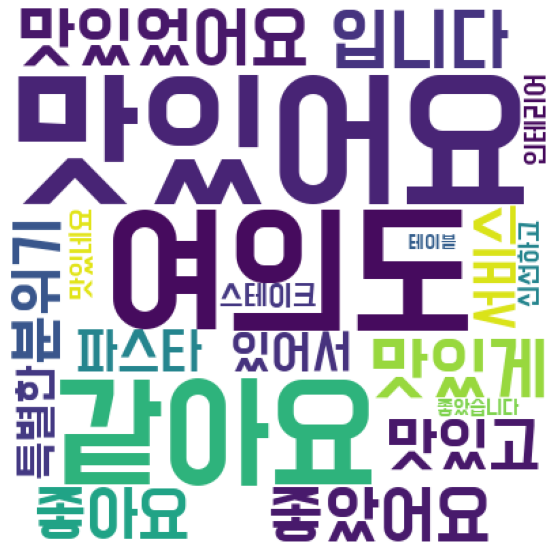

In [237]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)

## 원하는 그림으로 시각화

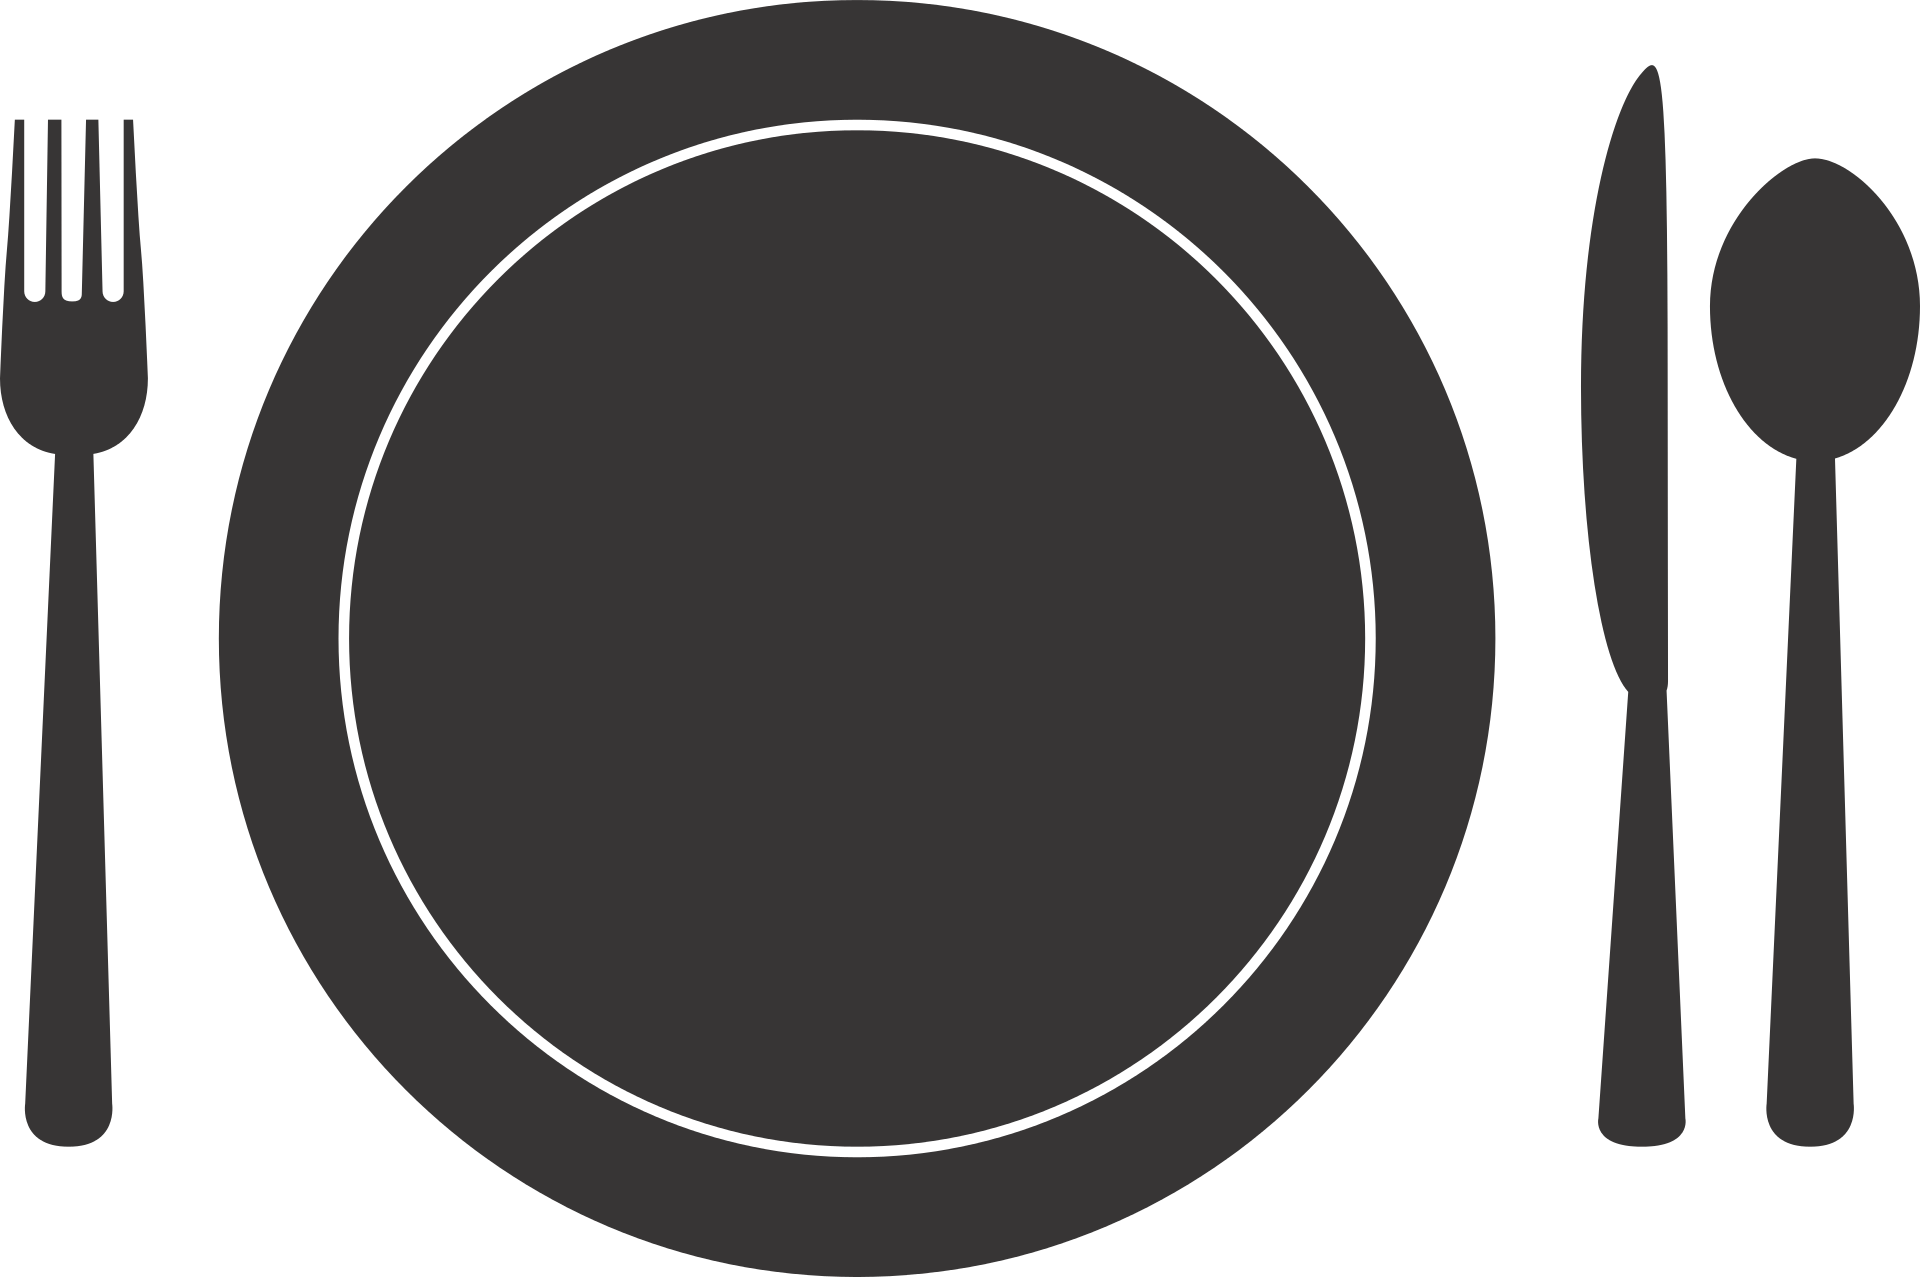

In [241]:
import PIL
icon = PIL.Image.open('food.png')
icon

In [242]:
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon,icon)
img = np.array(img)

In [243]:
wc = WordCloud(random_state = 1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask=img)

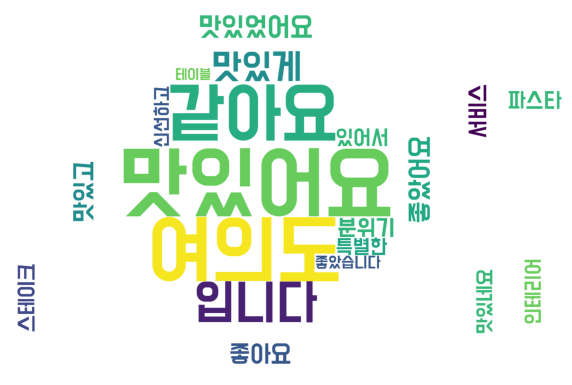

In [244]:
img_wordcloud=wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)